In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo (troque pelo nome correto do seu arquivo)
df = pd.read_csv("/content/funcionarios_empresa.csv")

# Visualizar primeiras linhas
df.head()


,ID_Funcionario,Nome,Idade,Departamento,Cargo,Salario,Tempo_Empresa_Meses,Data_Admissao,Nivel_Educacao,Estado_Civil,Tipo_Contrato,Avaliacao_Performance,Horas_Extras_Mes,Beneficios,Faltas_Ultimo_Ano,Satisfacao_Trabalho
0,1,Tatiane Mendes 001,40,Vendas,Vendedor Jr,3685.36,4,2025-05-18,Superior Completo,Casado(a),CLT,4.8,5,953.49,1,5.6
1,2,Ana Silva 002,23,Marketing,Coordenador de Marketing,8081.03,1,2025-08-16,Superior Completo,Solteiro(a),CLT,2.4,7,964.51,2,5.2
2,3,Rafael Alves 003,36,TI,Desenvolvedor Pleno,8491.98,2,2025-07-17,Pós-graduação,Solteiro(a),CLT,2.7,7,483.34,4,5.7
3,4,Carla Souza 004,32,Operações,Gerente de Operações,9745.30,9,2024-12-19,Ensino Médio,Casado(a),CLT,3.4,12,980.71,1,7.0
4,5,Pedro Costa 005,33,Financeiro,Analista Financeiro Jr,3556.68,63,2020-07-13,Pós-graduação,Solteiro(a),CLT,3.9,10,1031.64,1,6.5


In [10]:
# Ver primeiras linhas
df.head()

# Informações gerais
df.info()

# Estatísticas descritivas de dados numéricos
df.describe()

# Ver estatísticas de colunas categóricas
df.describe(include="object")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Funcionario         500 non-null    int64  
 1   Nome                   500 non-null    object 
 2   Idade                  500 non-null    int64  
 3   Departamento           500 non-null    object 
 4   Cargo                  500 non-null    object 
 5   Salario                500 non-null    float64
 6   Tempo_Empresa_Meses    500 non-null    int64  
 7   Data_Admissao          500 non-null    object 
 8   Nivel_Educacao         495 non-null    object 
 9   Estado_Civil           500 non-null    object 
 10  Tipo_Contrato          500 non-null    object 
 11  Avaliacao_Performance  475 non-null    float64
 12  Horas_Extras_Mes       500 non-null    int64  
 13  Beneficios             490 non-null    float64
 14  Faltas_Ultimo_Ano      500 non-null    int64  
 15  Satisf

,Nome,Departamento,Cargo,Data_Admissao,Nivel_Educacao,Estado_Civil,Tipo_Contrato
count,500,500,500,500,495,500,500
unique,500,7,31,86,7,4,4
top,Tatiane Mendes 500,Vendas,Coordenador de Marketing,2025-08-16,Superior Completo,Casado(a),CLT
freq,1,111,26,47,179,210,347


In [11]:
# Contagem de nulos por coluna
df.isnull().sum()


,0
ID_Funcionario,0
Nome,0
Idade,0
Departamento,0
Cargo,0
Salario,0
Tempo_Empresa_Meses,0
Data_Admissao,0
Nivel_Educacao,5
Estado_Civil,0


Exemplo de tratamento:

→ Preencher avaliação de performance com média
→ Preencher horas extras ausentes com 0 (caso faça sentido)

In [12]:
df['Avaliacao_Performance'] = df['Avaliacao_Performance'].fillna(df['Avaliacao_Performance'].mean())
df['Horas_Extras_Mes'] = df['Horas_Extras_Mes'].fillna(0)

# Confirmar
df.isnull().sum()


,0
ID_Funcionario,0
Nome,0
Idade,0
Departamento,0
Cargo,0
Salario,0
Tempo_Empresa_Meses,0
Data_Admissao,0
Nivel_Educacao,5
Estado_Civil,0


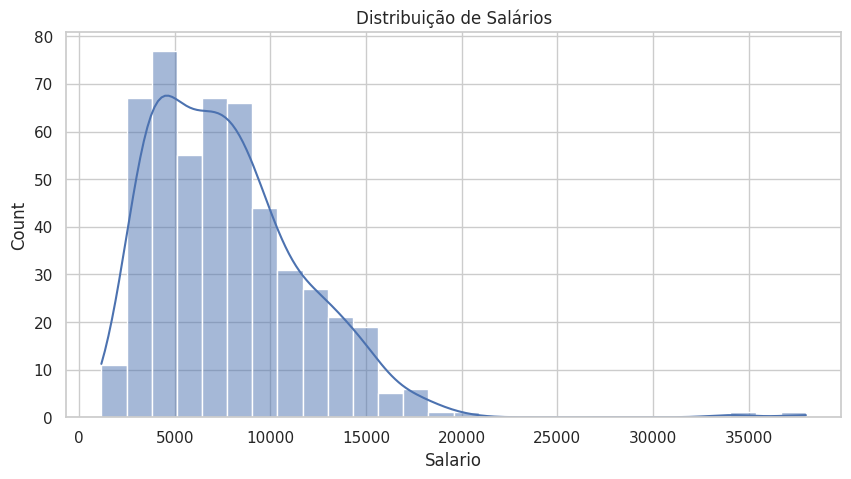

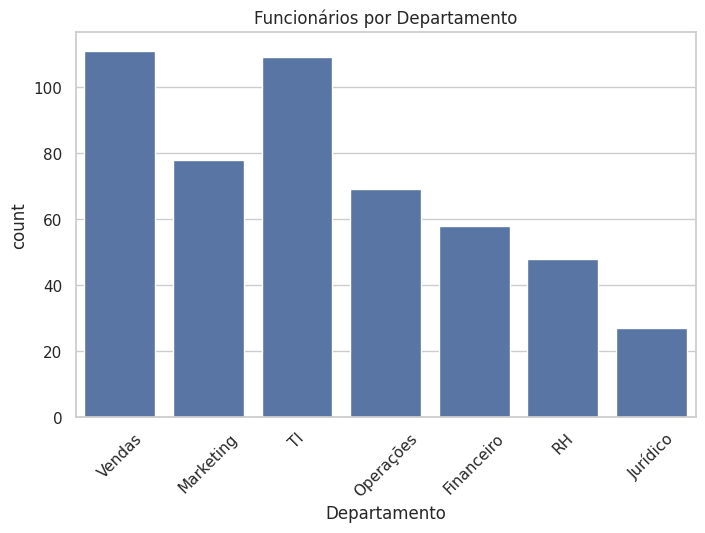

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Salario'], kde=True)
plt.title("Distribuição de Salários")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Departamento')
plt.title("Funcionários por Departamento")
plt.xticks(rotation=45)
plt.show()


Usando boxplot:

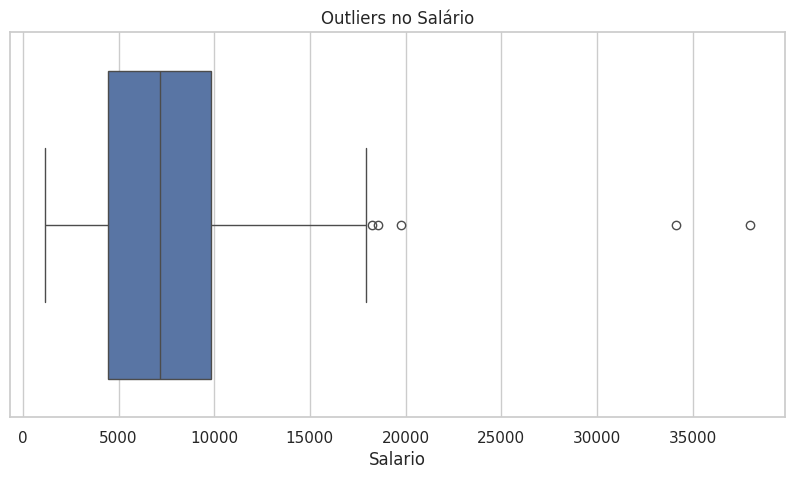

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x=df['Salario'])
plt.title("Outliers no Salário")
plt.show()


Detectando outliers usando IQR:

In [15]:
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Salario'] < limite_inferior) | (df['Salario'] > limite_superior)]
outliers


,ID_Funcionario,Nome,Idade,Departamento,Cargo,Salario,Tempo_Empresa_Meses,Data_Admissao,Nivel_Educacao,Estado_Civil,Tipo_Contrato,Avaliacao_Performance,Horas_Extras_Mes,Beneficios,Faltas_Ultimo_Ano,Satisfacao_Trabalho
8,9,Rafael Alves 009,37,TI,Gerente de TI,34134.45,28,2023-05-29,Superior Incompleto,Viúvo(a),CLT,2.5,9,931.31,4,4.9
53,54,João Santos 054,40,Vendas,Vendedor Sr,19770.45,65,2020-05-14,Superior Completo,Divorciado(a),CLT,3.6,4,400.36,3,5.6
163,164,João Santos 164,36,TI,Gerente de TI,18264.59,9,2024-12-19,Superior Completo,Divorciado(a),CLT,4.9,5,1021.18,1,6.2
327,328,Felipe Araújo 328,34,Financeiro,Gerente Financeiro,37988.03,32,2023-01-29,Superior Incompleto,Casado(a),PJ,3.9,10,964.82,1,6.8
345,346,Renata Freitas 346,22,Jurídico,Advogado Pleno,18551.99,72,2019-10-17,Ensino Médio,Solteiro(a),PJ,4.5,10,706.12,3,NaN


Opções comuns:

✔ Remover
✔ Ajustar para limite
✔ Investigar individualmente

In [16]:
df_sem_outliers = df[(df['Salario'] >= limite_inferior) & (df['Salario'] <= limite_superior)]
df_sem_outliers.head()


,ID_Funcionario,Nome,Idade,Departamento,Cargo,Salario,Tempo_Empresa_Meses,Data_Admissao,Nivel_Educacao,Estado_Civil,Tipo_Contrato,Avaliacao_Performance,Horas_Extras_Mes,Beneficios,Faltas_Ultimo_Ano,Satisfacao_Trabalho
0,1,Tatiane Mendes 001,40,Vendas,Vendedor Jr,3685.36,4,2025-05-18,Superior Completo,Casado(a),CLT,4.8,5,953.49,1,5.6
1,2,Ana Silva 002,23,Marketing,Coordenador de Marketing,8081.03,1,2025-08-16,Superior Completo,Solteiro(a),CLT,2.4,7,964.51,2,5.2
2,3,Rafael Alves 003,36,TI,Desenvolvedor Pleno,8491.98,2,2025-07-17,Pós-graduação,Solteiro(a),CLT,2.7,7,483.34,4,5.7
3,4,Carla Souza 004,32,Operações,Gerente de Operações,9745.30,9,2024-12-19,Ensino Médio,Casado(a),CLT,3.4,12,980.71,1,7.0
4,5,Pedro Costa 005,33,Financeiro,Analista Financeiro Jr,3556.68,63,2020-07-13,Pós-graduação,Solteiro(a),CLT,3.9,10,1031.64,1,6.5


In [17]:
df.to_csv("funcionarios_tratado.csv", index=False)
